In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

In [ ]:
#Norfolk
#url= 'https://data.norfolk.gov/resource/vfm4-5wv6.json'

# Make request and store response
#response = requests.get(url)

# Storing the JSON response within a variable
#norfolk_data = response.json()
# Use json.dumps to print the json
#print(json.dumps(norfolk_data, indent=4, sort_keys=True))

# Convert to DataFrame
#norfolk_df = pd.DataFrame(norfolk_data)

In [2]:
# Check link for csv file: https://data.norfolk.gov/Government/Norfolk-Animal-Care-and-Adoption-Center-NACC-/vfm4-5wv6
adoption= "Norfolk_Animal.csv"
adoption= pd.read_csv(adoption)
adoption.head()
adoption.shape
#adoption.dtypes

(29276, 21)

In [3]:
#Converting Intake Date and Outcome Date to pandas date format
adoption['Intake Date'] = pd.to_datetime(adoption['Intake Date'],format='%m/%d/%Y')
adoption['Outcome Date'] = pd.to_datetime(adoption['Outcome Date'],format='%m/%d/%Y')

#adoption.shape
#adoption.dtypes
adoption

,Animal ID,Animal Name,Animal Type,Sex,Years Old,Months Old,Primary Breed,Primary Color,Tag Number,Intake Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Outcome Date,Intake Month,Intake Day of the Week,Intake Year,Outcome Month,Outcome Day of the Week,Outcome Year
0,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.00,POODLE MIN,WHITE,L17-011989,2017-08-16,...,Over the Counter,Adoption,Walk-In,2017-08-19,NaN,NaN,NaN,NaN,NaN,NaN
1,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.00,POODLE MIN,WHITE,L17-011502,2017-05-03,...,Over the Counter,Adoption,Walk-In,2017-05-13,NaN,NaN,NaN,NaN,NaN,NaN
2,A000601,SHEILA E,Cat,Spayed Female,0.0,1.80,DOMESTIC SH,CALICO,L16-010051,2016-08-20,...,Transfer,Adoption,Website Information,2016-10-02,NaN,NaN,NaN,NaN,NaN,NaN
3,A001474,CHARLES,Dog,Neutered Male,1.0,0.00,LABRADOR RETR,YELLOW,NaN,2017-04-27,...,Over the Counter,Return to Owner,Walk-In,2017-06-06,NaN,NaN,NaN,NaN,NaN,NaN
4,A001474,CHARLES,Dog,Neutered Male,1.0,0.00,LABRADOR RETR,YELLOW,L16-009301,2016-03-30,...,Animal Cruelty,Return to Owner,NaN,2016-04-15,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29271,A059219,OZZY,Dog,Male,NaN,NaN,MASTIFF,RED,981020039165640,2020-11-22,...,Over the Counter,Adoption,Walk-In,2020-11-25,NaN,NaN,NaN,NaN,NaN,NaN
29272,A059228,NaN,Cat,Neutered Male,8.0,NaN,DOMESTIC SH,ORG TABBY,NaN,2020-11-23,...,Animal Cruelty,Disposal of Deceased Pet,NaN,2020-11-23,NaN,NaN,NaN,NaN,NaN,NaN
29273,A059254,NaN,Cat,Female,NaN,1.85,DOMESTIC SH,ORG TABBY,NaN,2020-11-27,...,Animal Control,Foster,Underage or Underweight,2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN
29274,A059260,CHOCOLATE,Dog,Male,2.0,NaN,POODLE TOY,BROWN,985112001208056,2020-11-29,...,Animal Control,Return to Owner,Walk-In,2020-11-29,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Pulling only the columns with outcome type as adoption
adoption= adoption.loc[adoption['Outcome Type'] == 'Adoption']
adoption
#adoption.dtypes

,Animal ID,Animal Name,Animal Type,Sex,Years Old,Months Old,Primary Breed,Primary Color,Tag Number,Intake Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Outcome Date,Intake Month,Intake Day of the Week,Intake Year,Outcome Month,Outcome Day of the Week,Outcome Year
0,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,L17-011989,2017-08-16,...,Over the Counter,Adoption,Walk-In,2017-08-19,NaN,NaN,NaN,NaN,NaN,NaN
1,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,L17-011502,2017-05-03,...,Over the Counter,Adoption,Walk-In,2017-05-13,NaN,NaN,NaN,NaN,NaN,NaN
2,A000601,SHEILA E,Cat,Spayed Female,0.0,1.8,DOMESTIC SH,CALICO,L16-010051,2016-08-20,...,Transfer,Adoption,Website Information,2016-10-02,NaN,NaN,NaN,NaN,NaN,NaN
17,A002987,ENZO,Dog,Neutered Male,1.0,0.0,PIT BULL,BLACK,L17-011517,2017-04-30,...,Over the Counter,Adoption,Walk-In,2017-05-16,NaN,NaN,NaN,NaN,NaN,NaN
28,A006357,SKIPPY,Dog,Neutered Male,5.0,0.0,BEAGLE,TRICOLOR,982000123128327,2016-05-03,...,Over the Counter,Adoption,NaN,2016-05-18,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29257,A059140,SARAH,Cat,Neutered Male,1.0,4.0,DOMESTIC SH,BRN TABBY,982126056569270,2020-11-14,...,Transfer,Adoption,Walk-In,2020-11-16,NaN,NaN,NaN,NaN,NaN,NaN
29258,A059142,NaN,Dog,Male,NaN,6.0,GERM SHEPHERD,TAN,981020039171781,2020-11-14,...,Animal Control,Adoption,NaN,2020-11-28,NaN,NaN,NaN,NaN,NaN,NaN
29265,A059175,NaN,Dog,Spayed Female,1.0,NaN,PIT BULL,BR BRINDLE,981020039180182,2020-11-19,...,Animal Control,Adoption,Walk-In,2020-11-25,NaN,NaN,NaN,NaN,NaN,NaN
29270,A059217,DODGE,Dog,Male,NaN,1.9,PIT BULL,TAN,981020039180052,2020-11-21,...,Animal Control,Adoption,Website Information,2020-11-27,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Adding outcome month and outcome year as additional columns
adoption['Outcome Month'] = adoption['Outcome Date'].map(lambda x: x.strftime('%m'))
adoption['Outcome Year'] = adoption['Outcome Date'].map(lambda x: x.strftime('%Y'))
adoption

<ipython-input-5-caad2c62beb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adoption['Outcome Month'] = adoption['Outcome Date'].map(lambda x: x.strftime('%m'))
<ipython-input-5-caad2c62beb4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adoption['Outcome Year'] = adoption['Outcome Date'].map(lambda x: x.strftime('%Y'))


,Animal ID,Animal Name,Animal Type,Sex,Years Old,Months Old,Primary Breed,Primary Color,Tag Number,Intake Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Outcome Date,Intake Month,Intake Day of the Week,Intake Year,Outcome Month,Outcome Day of the Week,Outcome Year
0,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,L17-011989,2017-08-16,...,Over the Counter,Adoption,Walk-In,2017-08-19,NaN,NaN,NaN,08,NaN,2017
1,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,L17-011502,2017-05-03,...,Over the Counter,Adoption,Walk-In,2017-05-13,NaN,NaN,NaN,05,NaN,2017
2,A000601,SHEILA E,Cat,Spayed Female,0.0,1.8,DOMESTIC SH,CALICO,L16-010051,2016-08-20,...,Transfer,Adoption,Website Information,2016-10-02,NaN,NaN,NaN,10,NaN,2016
17,A002987,ENZO,Dog,Neutered Male,1.0,0.0,PIT BULL,BLACK,L17-011517,2017-04-30,...,Over the Counter,Adoption,Walk-In,2017-05-16,NaN,NaN,NaN,05,NaN,2017
28,A006357,SKIPPY,Dog,Neutered Male,5.0,0.0,BEAGLE,TRICOLOR,982000123128327,2016-05-03,...,Over the Counter,Adoption,NaN,2016-05-18,NaN,NaN,NaN,05,NaN,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29257,A059140,SARAH,Cat,Neutered Male,1.0,4.0,DOMESTIC SH,BRN TABBY,982126056569270,2020-11-14,...,Transfer,Adoption,Walk-In,2020-11-16,NaN,NaN,NaN,11,NaN,2020
29258,A059142,NaN,Dog,Male,NaN,6.0,GERM SHEPHERD,TAN,981020039171781,2020-11-14,...,Animal Control,Adoption,NaN,2020-11-28,NaN,NaN,NaN,11,NaN,2020
29265,A059175,NaN,Dog,Spayed Female,1.0,NaN,PIT BULL,BR BRINDLE,981020039180182,2020-11-19,...,Animal Control,Adoption,Walk-In,2020-11-25,NaN,NaN,NaN,11,NaN,2020
29270,A059217,DODGE,Dog,Male,NaN,1.9,PIT BULL,TAN,981020039180052,2020-11-21,...,Animal Control,Adoption,Website Information,2020-11-27,NaN,NaN,NaN,11,NaN,2020


In [6]:
#Pulling out only the columns relevant for our research
norfolk_df= adoption[["Animal ID","Animal Type","Sex", "Years Old","Months Old","Primary Breed", "Primary Color","Intake Type","Intake Date","Outcome Type","Outcome Date","Outcome Month","Outcome Year"]]
norfolk_df

,Animal ID,Animal Type,Sex,Years Old,Months Old,Primary Breed,Primary Color,Intake Type,Intake Date,Outcome Type,Outcome Date,Outcome Month,Outcome Year
0,A000455,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,Return,2017-08-16,Adoption,2017-08-19,08,2017
1,A000455,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,Owner Surrendered,2017-05-03,Adoption,2017-05-13,05,2017
2,A000601,Cat,Spayed Female,0.0,1.8,DOMESTIC SH,CALICO,Transfer,2016-08-20,Adoption,2016-10-02,10,2016
17,A002987,Dog,Neutered Male,1.0,0.0,PIT BULL,BLACK,Stray,2017-04-30,Adoption,2017-05-16,05,2017
28,A006357,Dog,Neutered Male,5.0,0.0,BEAGLE,TRICOLOR,Owner Surrendered,2016-05-03,Adoption,2016-05-18,05,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29257,A059140,Cat,Neutered Male,1.0,4.0,DOMESTIC SH,BRN TABBY,Transfer,2020-11-14,Adoption,2020-11-16,11,2020
29258,A059142,Dog,Male,NaN,6.0,GERM SHEPHERD,TAN,Stray,2020-11-14,Adoption,2020-11-28,11,2020
29265,A059175,Dog,Spayed Female,1.0,NaN,PIT BULL,BR BRINDLE,Stray,2020-11-19,Adoption,2020-11-25,11,2020
29270,A059217,Dog,Male,NaN,1.9,PIT BULL,TAN,Stray,2020-11-21,Adoption,2020-11-27,11,2020


In [8]:
# URL for GET requests to retrieve COVID data for Norfolk, VA
url = "https://data.virginia.gov/resource/bre9-aqqr.json?locality=Norfolk"
#url = "https://data.virginia.gov/resource/bre9-aqqr.json"

response = requests.get(url)

# Print status code
print(response.status_code)

200


In [9]:
# Retrieving data and converting it into JSON
requests.get(url).json()

data = response.json()
print(json.dumps(data, indent=4))

[
    {
        "report_date": "2020-12-07T00:00:00.000",
        "fips": "51710",
        "locality": "Norfolk",
        "vdh_health_district": "Norfolk",
        "total_cases": "6894",
        "hospitalizations": "475",
        "deaths": "93"
    },
    {
        "report_date": "2020-12-06T00:00:00.000",
        "fips": "51710",
        "locality": "Norfolk",
        "vdh_health_district": "Norfolk",
        "total_cases": "6783",
        "hospitalizations": "476",
        "deaths": "93"
    },
    {
        "report_date": "2020-12-05T00:00:00.000",
        "fips": "51710",
        "locality": "Norfolk",
        "vdh_health_district": "Norfolk",
        "total_cases": "6786",
        "hospitalizations": "476",
        "deaths": "93"
    },
    {
        "report_date": "2020-12-04T00:00:00.000",
        "fips": "51710",
        "locality": "Norfolk",
        "vdh_health_district": "Norfolk",
        "total_cases": "6728",
        "hospitalizations": "471",
        "deaths": "92"
    }

In [10]:
# Create df 
COVID_df = pd.DataFrame(data)
COVID_df

,report_date,fips,locality,vdh_health_district,total_cases,hospitalizations,deaths
0,2020-12-07T00:00:00.000,51710,Norfolk,Norfolk,6894,475,93
1,2020-12-06T00:00:00.000,51710,Norfolk,Norfolk,6783,476,93
2,2020-12-05T00:00:00.000,51710,Norfolk,Norfolk,6786,476,93
3,2020-12-04T00:00:00.000,51710,Norfolk,Norfolk,6728,471,92
4,2020-12-03T00:00:00.000,51710,Norfolk,Norfolk,6654,470,92
...,...,...,...,...,...,...,...
261,2020-11-23T00:00:00.000,51710,Norfolk,Norfolk,6297,439,88
262,2020-11-24T00:00:00.000,51710,Norfolk,Norfolk,6344,442,89
263,2020-11-25T00:00:00.000,51710,Norfolk,Norfolk,6378,456,89
264,2020-11-26T00:00:00.000,51710,Norfolk,Norfolk,6401,457,89


Analyze the adoption data:

In [11]:
norfolk_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 29271
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Animal ID      10842 non-null  object        
 1   Animal Type    10842 non-null  object        
 2   Sex            10842 non-null  object        
 3   Years Old      6640 non-null   float64       
 4   Months Old     6799 non-null   float64       
 5   Primary Breed  10842 non-null  object        
 6   Primary Color  10842 non-null  object        
 7   Intake Type    10842 non-null  object        
 8   Intake Date    10842 non-null  datetime64[ns]
 9   Outcome Type   10842 non-null  object        
 10  Outcome Date   10842 non-null  datetime64[ns]
 11  Outcome Month  10842 non-null  object        
 12  Outcome Year   10842 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 1.2+ MB


In [20]:
#year_group = norfolk_df.groupby('Outcome Year')
group= norfolk_df.groupby(['Outcome Year'])

year= group.count()
year


#plt.plot(norfolk_df['Outcome Month'], norfolk_df['Outcome Type'])

,Animal ID,Animal Type,Sex,Years Old,Months Old,Primary Breed,Primary Color,Intake Type,Intake Date,Outcome Type,Outcome Date,Outcome Month
Outcome Year,,,,,,,,,,,,
2015,223,223,223,223,223,223,223,223,223,223,223,223
2016,2391,2391,2391,2391,2390,2391,2391,2391,2391,2391,2391,2391
2017,2240,2240,2240,1214,1208,2240,2240,2240,2240,2240,2240,2240
2018,2195,2195,2195,1045,1088,2195,2195,2195,2195,2195,2195,2195
2019,2239,2239,2239,1010,1160,2239,2239,2239,2239,2239,2239,2239
2020,1554,1554,1554,757,730,1554,1554,1554,1554,1554,1554,1554


In [36]:
year1_df = norfolk_df.loc[norfolk_df['Outcome Year'] == '2018']
year1_adoptions = year1_df["Outcome Month"].value_counts()
year1_adoptions

08    259
12    231
06    211
07    195
05    186
10    185
11    181
03    172
09    161
04    156
02    139
01    119
Name: Outcome Month, dtype: int64

In [37]:
year2_df = norfolk_df.loc[norfolk_df['Outcome Year'] == '2019']
year2_adoptions = year2_df["Outcome Month"].value_counts()
year2_adoptions

08    252
10    250
07    249
06    190
09    189
05    185
11    181
12    174
01    157
04    140
02    136
03    136
Name: Outcome Month, dtype: int64

In [38]:
year3_df = norfolk_df.loc[norfolk_df['Outcome Year'] == '2020']
year3_adoptions = year3_df["Outcome Month"].value_counts()
year3_adoptions

11    186
07    173
01    167
03    164
08    154
02    154
10    154
09    148
06    110
04     80
05     64
Name: Outcome Month, dtype: int64

In [40]:
adoption_by_month = pd.DataFrame({
    "2018": year1_adoptions,
    "2019": year2_adoptions,
    "2020": year3_adoptions
})
adoption_by_month

,2018,2019,2020
01,119,157,167.0
02,139,136,154.0
03,172,136,164.0
04,156,140,80.0
05,186,185,64.0
06,211,190,110.0
07,195,249,173.0
08,259,252,154.0
09,161,189,148.0
10,185,250,154.0


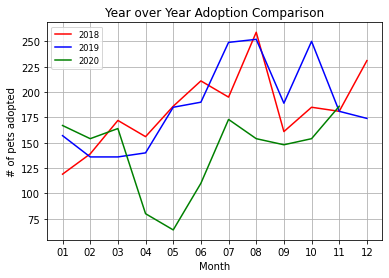

In [53]:
fig = plt.figure()
ax=fig.add_subplot(111)

ax.plot()
ax.plot(adoption_by_month.index,adoption_by_month["2018"],color = 'r',label = '2018')
ax.plot(adoption_by_month.index,adoption_by_month["2019"],color="b", label='2019' )
ax.plot(adoption_by_month.index,adoption_by_month["2020"],color="g", label='2020')
#plt.plot(adoption_by_month['Year'],adoption_by_month['Number of Adoptions'],color="r", marker="o", markersize=7, linestyle="dashed", linewidth=1)

plt.xlabel('Month')
plt.ylabel('# of pets adopted')
plt.title("Year over Year Adoption Comparison")
#plt.legend(handles=('2018', '2019','2020'), loc="best")

plt.legend(loc="best",fontsize="small",fancybox=True)
plt.grid(True)
plt.show()

We notice that adoption rates are decreasing in 2020 compared to previous years.

Analyzing COVID data


In [59]:
#COVID_df.dtypes
COVID_df['Outcome Dates'] = pd.to_datetime(COVID_df['report_date'],format='%Y/%m/%d')

COVID_df['Outcome Month'] = COVID_df['Outcome Dates'].map(lambda x: x.strftime('%m'))
COVID_df

,report_date,fips,locality,vdh_health_district,total_cases,hospitalizations,deaths,Outcome Month,Outcome Dates
0,2020-12-07T00:00:00.000,51710,Norfolk,Norfolk,6894,475,93,12,2020-12-07
1,2020-12-06T00:00:00.000,51710,Norfolk,Norfolk,6783,476,93,12,2020-12-06
2,2020-12-05T00:00:00.000,51710,Norfolk,Norfolk,6786,476,93,12,2020-12-05
3,2020-12-04T00:00:00.000,51710,Norfolk,Norfolk,6728,471,92,12,2020-12-04
4,2020-12-03T00:00:00.000,51710,Norfolk,Norfolk,6654,470,92,12,2020-12-03
...,...,...,...,...,...,...,...,...,...
261,2020-11-23T00:00:00.000,51710,Norfolk,Norfolk,6297,439,88,11,2020-11-23
262,2020-11-24T00:00:00.000,51710,Norfolk,Norfolk,6344,442,89,11,2020-11-24
263,2020-11-25T00:00:00.000,51710,Norfolk,Norfolk,6378,456,89,11,2020-11-25
264,2020-11-26T00:00:00.000,51710,Norfolk,Norfolk,6401,457,89,11,2020-11-26


In [125]:
covid_group = COVID_df.groupby(['Outcome Month'])
covid_max_df=covid_group['total_cases'].max()
covid_max_df


COVID_by_month = pd.DataFrame({
    "# of Cases": covid_max_df
   
})
COVID_by_month

,# of Cases
Outcome Month,
03,8
04,99
05,503
06,915
07,987
08,4394
09,4881
10,5493
11,6528


plot the COVID data

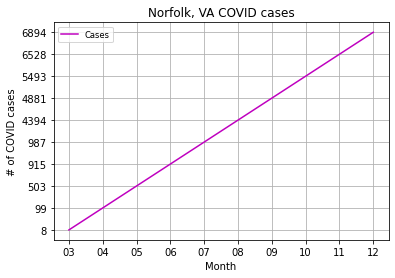

In [80]:

plt.plot(COVID_by_month.index,COVID_by_month['# of Cases'],color = 'm',label = 'Cases')

#['Outcome Month']

plt.xlabel('Month')
plt.ylabel('# of COVID cases')
plt.title("Norfolk, VA COVID cases")

plt.legend(loc="best",fontsize="small",fancybox=True)
plt.grid(True)
plt.show()

plot the delta number of cases month over month

In [128]:
COVID_by_month['# of Cases'] = COVID_by_month['# of Cases'].astype(int)

COVID_diff = COVID_by_month['# of Cases'].diff().fillna(0)

COVID_diff

COVID_per_month = pd.DataFrame({"# of Cases": COVID_diff,
                              "Month": COVID_diff.index})
COVID_per_month

,# of Cases,Month
Outcome Month,,
03,0.0,03
04,91.0,04
05,404.0,05
06,412.0,06
07,72.0,07
08,3407.0,08
09,487.0,09
10,612.0,10
11,1035.0,11


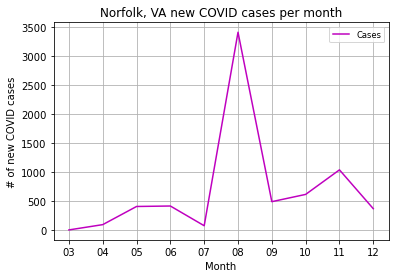

In [89]:
plt.plot(COVID_per_month.index,COVID_per_month['# of Cases'],color = 'm',label = 'Cases')

#['Outcome Month']

plt.xlabel('Month')
plt.ylabel('# of new COVID cases')
plt.title("Norfolk, VA new COVID cases per month")

plt.legend(loc="best",fontsize="small",fancybox=True)
plt.grid(True)
plt.show()


Plot adoption data and COVID cases side-by-side

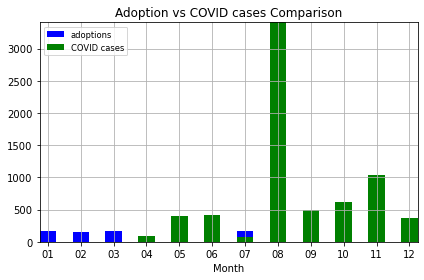

In [94]:
fig = plt.figure()

ax = plt.subplot(111)
ax.bar(adoption_by_month.index,adoption_by_month['2020'], width=0.5, color='b', align='center', label = 'adoptions')
ax.bar(COVID_per_month.index,COVID_per_month['# of Cases'], width=0.5, color='g', align='center',label='COVID cases')
ax.autoscale(tight=True)
plt.xlabel('Month')
#plt.ylabel('# of pets adopted')
plt.title("Adoption vs COVID cases Comparison")
#plt.legend(handles=('2018', '2019','2020'), loc="best")
fig.tight_layout()
plt.legend(loc="best",fontsize="small",fancybox=True)
plt.grid(True)
plt.show()

In [ ]:
Plot on a scatter plot covid cases vs pet adoption

In [129]:


new_row = pd.DataFrame({"# of Cases": 0,"Month": "02"},index =[0])

# simply concatenate both dataframes 
COVID_per_month = pd.concat([new_row, COVID_per_month]).reset_index(drop = True) 
new_row = pd.DataFrame({"# of Cases": 0,"Month": "01"},index =[0])

# simply concatenate both dataframes 
COVID_per_month = pd.concat([new_row, COVID_per_month]).reset_index(drop = True) 

COVID_per_month


,# of Cases,Month
0,0.0,01
1,0.0,02
2,0.0,03
3,91.0,04
4,404.0,05
5,412.0,06
6,72.0,07
7,3407.0,08
8,487.0,09
9,612.0,10


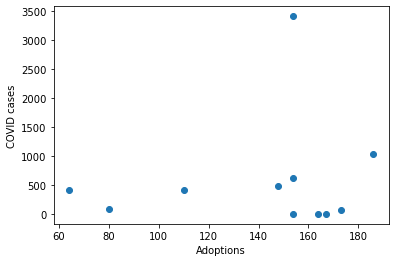

In [132]:
plt.scatter(adoption_by_month['2020'],COVID_per_month['# of Cases'])


plt.xlabel("Adoptions")
plt.ylabel("COVID cases")


plt.show()